In [1]:
#mengimport library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from keras.layers import Dense, Flatten 
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
#menginisiasi atau memberikan nilai awal pada variabel train dan validation serta melakukan perubahan ukuran gambar
#menghasilkan array dari 1-255 berdasarkan indeks warna pada gambar
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [3]:
#memasukkan data set
#train.flow_from_directory('Train') -- menunjukkan direktori -- size
train_dataset = train.flow_from_directory('/content/drive/My Drive/DATA ML/[W1]RPS/dataset/', target_size = (50,50), batch_size = 1, class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/My Drive/DATA ML/[W1]RPS/validation/', target_size = (50,50), batch_size = 1, class_mode = 'categorical')

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [4]:
#mengindikasikan jumlah kelas pada train dan validation
train_dataset.class_indices
validation_dataset.class_indices

{'paper': 0, 'rock': 1, 'scissor': 2}

In [5]:
model = tf.keras.models.Sequential([
    #convolution layer 1 dengan 1x1
    tf.keras.layers.Conv2D(filters = 1, kernel_size = 3, padding = 'same', activation = 'relu', input_shape=(50, 50, 3)),
    #convolution layer 2 3x3
    tf.keras.layers.Conv2D(filters = 3, kernel_size = 3, padding = 'same', activation = 'relu'),
    #convolution layer 3 5x5
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 3, padding = 'same', activation = 'relu'),
    #convolution layer 4 3x3
    tf.keras.layers.Conv2D(filters = 3, kernel_size = 3, padding = 'same', activation = 'relu'),
    #maxpooling 1
    tf.keras.layers.MaxPooling2D(2,2),
    #falatten layer konversi indeks array ke single vektor
    tf.keras.layers.Flatten(),
    #fullyconnected layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    #model output
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [6]:
#membuat ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 1)         28        
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 3)         30        
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 5)         140       
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 3)         138       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 3)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1875)              0         
                                                        

In [7]:
#melakukan optimasi model
optimize = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimize, metrics=['accuracy'])

In [8]:
#melakukan pelatihan
model_fit = model.fit(train_dataset,
                      epochs = 250,
                      validation_data = validation_dataset)

Epoch 1/250
480/480 [==============================] - 7s 9ms/step - loss: 1.0592 - accuracy: 0.3812 - val_loss: 0.7047 - val_accuracy: 0.6167
Epoch 2/250
480/480 [==============================] - 4s 8ms/step - loss: 0.5523 - accuracy: 0.7792 - val_loss: 0.2130 - val_accuracy: 0.9417
Epoch 3/250
480/480 [==============================] - 4s 8ms/step - loss: 0.2312 - accuracy: 0.9125 - val_loss: 0.0951 - val_accuracy: 0.9583
Epoch 4/250
480/480 [==============================] - 4s 9ms/step - loss: 0.1308 - accuracy: 0.9521 - val_loss: 0.0989 - val_accuracy: 0.9667
Epoch 5/250
480/480 [==============================] - 4s 9ms/step - loss: 0.1262 - accuracy: 0.9604 - val_loss: 0.0412 - val_accuracy: 0.9833
Epoch 6/250
480/480 [==============================] - 4s 8ms/step - loss: 0.0434 - accuracy: 0.9854 - val_loss: 0.0120 - val_accuracy: 0.9917
Epoch 7/250
480/480 [==============================] - 4s 8ms/step - loss: 0.1317 - accuracy: 0.9583 - val_loss: 0.0124 - val_accuracy: 0.9917

In [9]:
model_fit.history['loss']
print ("------")
model_fit.history['accuracy']

------


[0.3812499940395355,
 0.7791666388511658,
 0.9125000238418579,
 0.9520833492279053,
 0.9604166746139526,
 0.9854166507720947,
 0.9583333134651184,
 0.9833333492279053,
 0.9750000238418579,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 

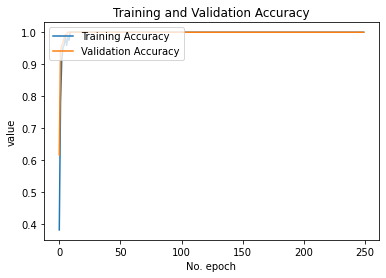

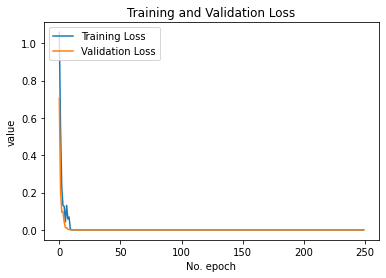

In [10]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [11]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# Parameters
input_size = (50,50)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['paper', 'rock', 'scissor']

In [13]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

1/1 [==============================] - 0s 121ms/step
scissor 1.0


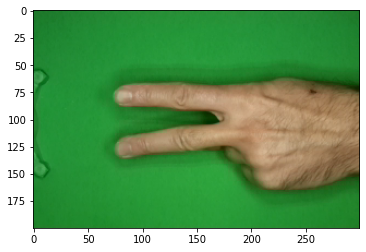

In [14]:
im = Image.open("/content/drive/My Drive/DATA ML/[W1]RPS/datatest/55yz6JI9f5DTbq9D.png")
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)
plt.imshow(im)
print( labels[np.argmax(y)], np.max(y) )